In [1]:
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import os
from inspect import cleandoc
import timeit
from experiments.benchmark_utils import do_op_instrumentation_benchmarks, \
    do_op_inspections_benchmarks, OperatorBenchmarkType, do_full_pipeline_benchmarks, \
    PipelineBenchmarkType
import matplotlib
import statistics

from mlinspect.utils import get_project_root

from IPython.utils import io

import warnings
warnings.filterwarnings('ignore')

Defined plot_runtimes, example output:


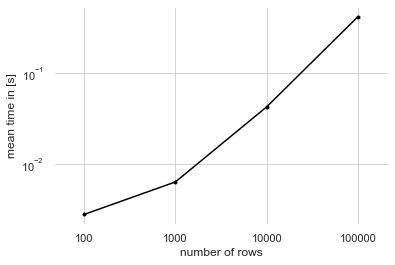

In [2]:
def plot_runtimes(run_row_numbers, time_per_run, title_and_path, save_to_file=False):
    # Data for plotting
    np_times = np.array(time_per_run)
    np_row_numbers = np.array(run_row_numbers)

    # Note that using plt.subplots below is equivalent to using
    # fig = plt.figure() and then ax = fig.add_subplot(111)
    fig, ax = plt.subplots()
    
    ax.set_yscale('log') # TODO: Decide how to plot this
    ax.plot(np_times, marker='o', color='black', markersize=3)
    
    ax.set_xticks(range(0,len(run_row_numbers)))
    ax.set_xticklabels(run_row_numbers)
    
    ax.set_facecolor('white')
    
    #fig.set_size_inches(8, 10)
    ax.axis('equal')
    #plt.locator_params("y", numticks=12)
    #major_ticks = [0.001, 0.01, 0.1, 1., 10.][:len(run_row_numbers)]
    #ax.set_yticks(major_ticks)
    
    # ax.set_ylim([0,10])
    ax.set(xlabel='number of rows', ylabel='mean time in [s]')
    ax.grid(True, color='lightgrey')
    if save_to_file:
        fig.savefig(title_and_path + '.svg', bbox_inches='tight')
        fig.savefig(title_and_path + '.png', bbox_inches='tight', dpi=800)
    
    plt.show()
    plt.close()
    
test_row_numbers = [100, 1000, 10000, 100000]
test_plot_runtimes = [0.0028039772499999227, 0.006364328399999941, 0.04229586309999993, 0.4114196768999999]

print('Defined plot_runtimes, example output:')
plot_runtimes(test_row_numbers, test_plot_runtimes, 'test_plot_runtimes')

Defined plot_runtimes_all, example output:


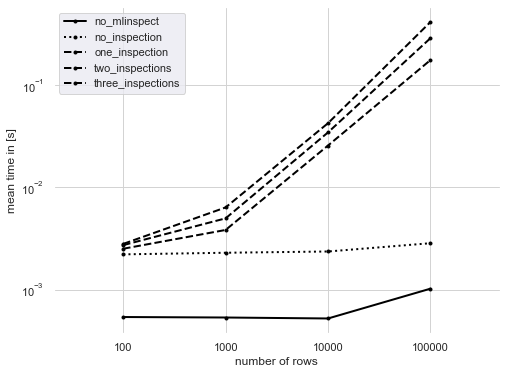

In [3]:
def plot_runtimes_all(run_row_numbers, benchmark_results, linestyles, title_and_path, save_to_file=False):
    # Note that using plt.subplots below is equivalent to using
    # fig = plt.figure() and then ax = fig.add_subplot(111)
    fig, ax = plt.subplots()
    ax.set_yscale('log') # TODO: Decide how to plot this
    
    #ax.plot(losses_orig, marker='o', color='black', linewidth=2, linestyle='dashed', label="orig")
    for label, results in benchmark_results.items():
        # Data for plotting
        np_times = np.array(results)
        if label in linestyles:
            linestyle = linestyles[label]
            ax.plot(np_times, marker='o', color='black', linewidth=2, linestyle=linestyle, label=label, markersize=3)
    
    ax.set_xticks(range(0,len(run_row_numbers)))
    ax.set_xticklabels(run_row_numbers)
    
    ax.set_facecolor('white')
    
    fig.set_size_inches(8, 6)
    ax.axis('equal')
    # major_ticks = np.arange(0, 10, 3)
    # ax.set_yticks(major_ticks)
    
    # ax.set_ylim([0,10])
    ax.set(xlabel='number of rows', ylabel='mean time in [s]')
    ax.grid(True, color='lightgrey')
    
    plt.legend()
    
    if save_to_file:
        fig.savefig(title_and_path + '.svg', bbox_inches='tight')
        fig.savefig(title_and_path + '.png', bbox_inches='tight', dpi=800)
    
    plt.show()
    plt.close()

test_row_numbers = [100, 1000, 10000, 100000]
test_benchmark_results = {\
    "no_mlinspect": [0.0005420450000000798, 0.0005361602000002463, 0.0005246571999999005, 0.0010252619999999268],
    "no_inspection": [0.0022168788499999257, 0.0022983642499999402, 0.0023646199999999506, 0.0028484614500001726],
    "one_inspection": [0.002515717000000084, 0.0038362508500000116, 0.025606818549999976, 0.17484780609999992],
    "two_inspections": [0.002726666, 0.004980573499999963, 0.03439934060000005, 0.28592700379999964],
    "three_inspections": [0.0028039772499999227, 0.006364328399999941, 0.04229586309999993, 0.4114196768999999]
}

print('Defined plot_runtimes_all, example output:')
linestyles = {"no_mlinspect": "solid", 
             "no_inspection": "dotted", 
             "one_inspection": "dashed", 
             "two_inspections": "dashed", 
             "three_inspections": "dashed"}
plot_runtimes_all(test_row_numbers, test_benchmark_results, linestyles, 'test_plot_runtimes_all')

Defined box_plot_full_pipeline_results, example output:


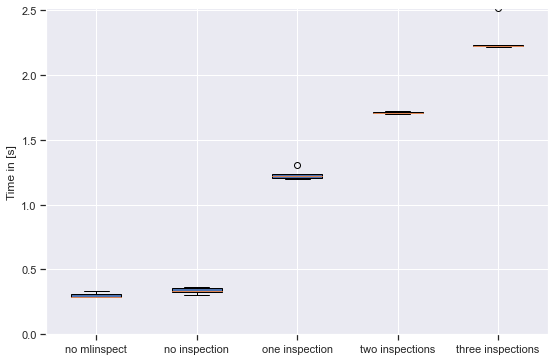

In [4]:
def box_plot_full_pipeline_results(benchmark_results, name, save_to_file=False):    
    # Create a figure instance
    fig = plt.figure(1, figsize=(9, 6))

    # Create an axes instance
    ax = fig.add_subplot(111)
    
    ## add patch_artist=True option to ax.boxplot() 
    ## to get fill color
    data_to_plot = benchmark_results.values()
    bp = ax.boxplot(data_to_plot, patch_artist=True)

    ## change outline color, fill color and linewidth of the boxes
    #for box in bp['boxes']:
    #    # change outline color
    #    box.set( color='#7570b3', linewidth=2)
        # change fill color
    #    box.set( facecolor = '#1b9e77' )

    ## change color and linewidth of the whiskers
    #for whisker in bp['whiskers']:
    #    whisker.set(color='#7570b3', linewidth=2)

    ## change color and linewidth of the caps
    #for cap in bp['caps']:
    #    cap.set(color='#7570b3', linewidth=2)

    ## change color and linewidth of the medians
    #for median in bp['medians']:
    #    median.set(color='#b2df8a', linewidth=2)

    ## change the style of fliers and their fill
    #for flier in bp['fliers']:
    #    flier.set(marker='o', color='#e7298a', alpha=0.5)
        
    ## Custom x-axis labels
    ax.set_xticklabels(benchmark_results.keys())
    
    ## Remove top axes and right axes ticks
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
    ax.set_ylabel('Time in [s]')
    
    ax.autoscale(enable=True, tight=True)
    ax.set_ylim([0.0, None])

    # Save the figure
    if save_to_file:
        fig.savefig(result_file_name + '.svg', bbox_inches='tight')
    plt.show()
    plt.close()

print('Defined box_plot_full_pipeline_results, example output:')
test_benchmark_results = {
    "no mlinspect": [0.3328154240000458, 0.29041089500003636, 0.28595826900004795, 0.30949507700006507, 0.2908414740001035],
    "no inspection": [0.3638599429999658, 0.334859200999972, 0.35457435500006795, 0.3023559349999232, 0.3244804189999968],
    "one inspection": [1.1991266320000022, 1.2222170320000032, 1.309182582999938, 1.2018000110000457, 1.2360804480000525],
    "two inspections": [1.720092654000041, 1.7146672159999525, 1.7053870940000024, 1.7045333490000303, 1.7027777409999771],
    "three inspections": [2.2129864439999665, 2.2243778859999566, 2.2320164879999993, 2.2251516389999324, 2.5162970650000034]
}
box_plot_full_pipeline_results(test_benchmark_results, "test_box_plot_full_pipeline_results")

In [5]:
def benchmark_op_instrumentation_and_plot_result(op_type: OperatorBenchmarkType, plot_linestyles, repeats):
    print("Instrumentation Results for {}".format(op_type.value))
    mean_benchmark_results = {}

    for row_number in row_numbers:
        benchmark_results = do_op_instrumentation_benchmarks(row_number, op_type, repeats)
        for label, results in benchmark_results.items():
            current_list = mean_benchmark_results.get(label, [])
            current_list.append(statistics.mean(results))
            mean_benchmark_results[label] = current_list

        print("Done: {}".format(row_number))

    for label, results in mean_benchmark_results.items():
        print("{}: {}".format(label, results))
    
    plot_runtimes_all(row_numbers, mean_benchmark_results, plot_linestyles, 'all_runtimes_projection')

In [6]:
def benchmark_op_inspections_and_plot_result(op_type: OperatorBenchmarkType, plot_linestyles, repeats):
    print("Inspection Results for {}".format(op_type.value))
    mean_benchmark_results = {}

    for row_number in row_numbers:
        benchmark_results = do_op_inspections_benchmarks(row_number, op_type, repeats)
        for label, results in benchmark_results.items():
            current_list = mean_benchmark_results.get(label, [])
            current_list.append(statistics.mean(results))
            mean_benchmark_results[label] = current_list

        print("Done: {}".format(row_number))

    for label, results in mean_benchmark_results.items():
        print("{}: {}".format(label, results))
    
    plot_runtimes_all(row_numbers, mean_benchmark_results, plot_linestyles, 'all_runtimes_projection')

In [7]:
def benchmark_full_pipeline_and_plot_result(pipeline: PipelineBenchmarkType, repeats):
    print("Full Pipeline Execution Results for {}".format(pipeline.value))
    with io.capture_output() as captured:
        benchmark_results = do_full_pipeline_benchmarks(pipeline, repeats)
    mean_benchmark_results = {}
    for label, results in benchmark_results.items():
        mean_benchmark_results[label] = statistics.mean(results)
        
    print("Results")
    for label, results in benchmark_results.items():
        print("{}: {}".format(label, results))

    print("Mean Results")
    for label, results in mean_benchmark_results.items():
        print("{}: {}".format(label, results))
        
    box_plot_full_pipeline_results(benchmark_results, pipeline.value)

In [8]:
row_numbers = [100, 1000, 10000]
#row_numbers = [100, 1000, 10000, 100000]
#row_numbers = [100, 1000, 10000, 100000, 1000000]

repeats = 1
#repeats = 5
#repeats = 15

instrumentation_linestyles = {"no mlinspect": "solid", # Can be commented out to remove it from plot
    "no inspection": "dotted", 
    "one inspection": "dashed", 
    "two inspections": "dashed", 
    "three inspections": "dashed"}

inspection_linestyles = {"empty inspection": "solid",
    "MaterializeFirstRowsInspection(10)": "dotted", 
    "LineageInspection(10)": "dashed", 
    "HistogramInspection(['group_col_1'])": "dashdot",
    "HistogramInspection(['group_col_1', 'group_col_2', 'group_col_3'])": "dashdot"}

Instrumentation Results for projection
Done: 100
Done: 1000
Done: 10000
Done: 100000
no mlinspect: [0.0007897059333333622, 0.0006599693333333434, 0.0007252827999999193, 0.000992345666666831]
no inspection: [0.0025924198666667547, 0.0025830436666667584, 0.002716079066667021, 0.0028629040666665164]
one inspection: [0.0029917673999999414, 0.00436655193333344, 0.023073685933333248, 0.19875661886666643]
two inspections: [0.003206789066666656, 0.005823594599999934, 0.03928799106666657, 0.3355010807333334]
three inspections: [0.004036246400000051, 0.008051115266666641, 0.05391677226666663, 0.4448913484666666]


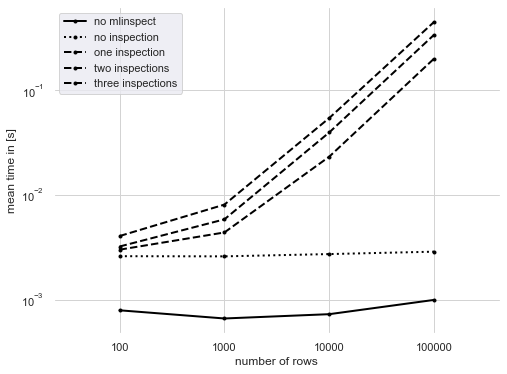

In [9]:
benchmark_op_instrumentation_and_plot_result(OperatorBenchmarkType.PROJECTION, instrumentation_linestyles, repeats)

Instrumentation Results for selection
Done: 100
Done: 1000
Done: 10000
Done: 100000
no mlinspect: [0.0007048276666675216, 0.00048352393333270054, 0.0007446978666663995, 0.0032590406666656692]
no inspection: [0.0053020547333332505, 0.005611723800000827, 0.0065903589333350015, 0.024771573799999183]
one inspection: [0.009378333199999152, 0.013735381999999656, 0.04460343986666686, 0.3970368051333329]
two inspections: [0.009520200200000299, 0.015314293333334679, 0.062210024933334294, 0.5971651971999999]
three inspections: [0.009948451999999481, 0.01643397473333247, 0.08361543099999835, 0.7055537518666672]


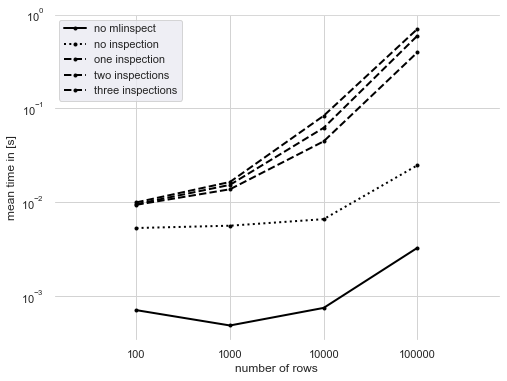

In [10]:
benchmark_op_instrumentation_and_plot_result(OperatorBenchmarkType.SELECTION, instrumentation_linestyles, repeats)

Instrumentation Results for join
Done: 100
Done: 1000
Done: 10000
Done: 100000
no mlinspect: [0.002564876266667208, 0.0018111700666660604, 0.0047728126666678845, 0.024388573266668344]
no inspection: [0.006570187600000092, 0.006714840933336556, 0.015597047933331965, 0.07403731273333278]
one inspection: [0.014662398866665665, 0.018399190133335235, 0.082203951599998, 0.5310975418666696]
two inspections: [0.015661359066665645, 0.020038133199999683, 0.09015474480000876, 0.7219786475999967]
three inspections: [0.015348087333335533, 0.021638565599999993, 0.10290740400000307, 0.8468621246666658]


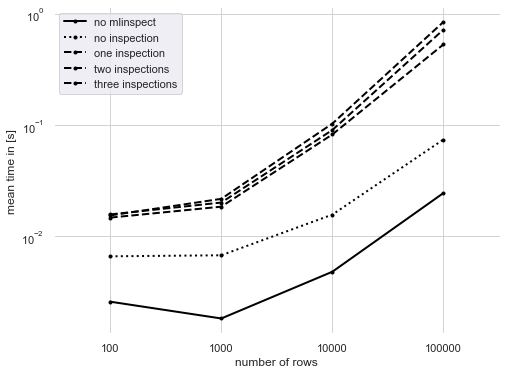

In [11]:
benchmark_op_instrumentation_and_plot_result(OperatorBenchmarkType.JOIN, instrumentation_linestyles, repeats)

Instrumentation Results for one_hot_encoder
Done: 100
Done: 1000
Done: 10000
Done: 100000
no mlinspect: [0.0008715726666669828, 0.0015691050000024612, 0.0034758089333384607, 0.01953219053333252]
no inspection: [0.0028235171333297632, 0.0036963814666648885, 0.005604621466666989, 0.02092222746666721]
one inspection: [0.003628461066667417, 0.005842834733336607, 0.025313805666665228, 0.18939749966666378]
two inspections: [0.004865726133336541, 0.007008692333331131, 0.03264648246666866, 0.2908208389333348]
three inspections: [0.005404514533334274, 0.009468424866668101, 0.05047719493333602, 0.3739306251333308]


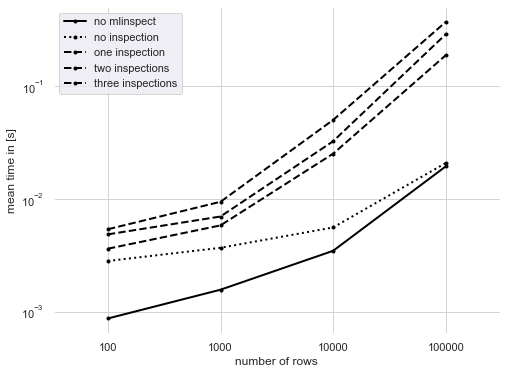

In [12]:
benchmark_op_instrumentation_and_plot_result(OperatorBenchmarkType.ONE_HOT_ENCODER, instrumentation_linestyles, repeats)

Instrumentation Results for standard_scaler
Done: 100
Done: 1000
Done: 10000
Done: 100000
no mlinspect: [0.0032539533333344178, 0.002398697399991079, 0.0023738788666719302, 0.003194222266667642]
no inspection: [0.0044566560666680745, 0.0036131734000036885, 0.003756959866664526, 0.006772701733333027]
one inspection: [0.004975774133335638, 0.0054172565999977, 0.019393967066664193, 0.16385002373333085]
two inspections: [0.005036684866663184, 0.0069823221333327485, 0.029400197399998735, 0.26562076973333054]
three inspections: [0.004387775266665509, 0.007463940266664319, 0.03963305966667197, 0.36324518813333384]


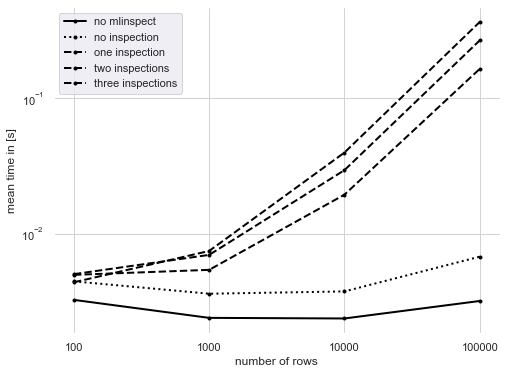

In [13]:
benchmark_op_instrumentation_and_plot_result(OperatorBenchmarkType.STANDARD_SCALER, instrumentation_linestyles, repeats)

Instrumentation Results for decision_tree
Done: 100
Done: 1000
Done: 10000
Done: 100000
no mlinspect: [0.0033961259333333753, 0.010826922799985065, 0.06649295106667523, 0.7205327014000052]
no inspection: [0.004840467466666117, 0.012058843266663644, 0.06727144926666521, 0.7319530755999949]
one inspection: [0.00901828313333226, 0.024188459666667463, 0.14666226000000507, 1.538039773799998]
two inspections: [0.009975810933334136, 0.02470736620000101, 0.17393134833333382, 1.7329115392000063]
three inspections: [0.009476917266658802, 0.025388653466654885, 0.17772371826665298, 1.7670185125333508]


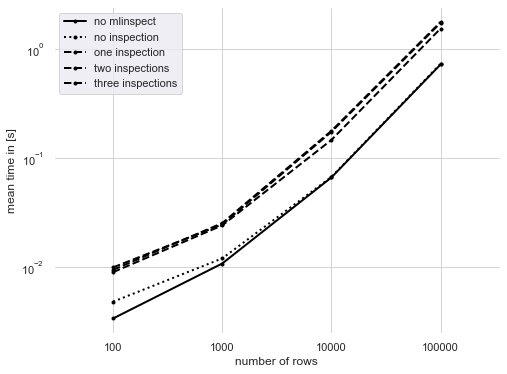

In [14]:
benchmark_op_instrumentation_and_plot_result(OperatorBenchmarkType.DECISION_TREE, instrumentation_linestyles, repeats)

Inspection Results for projection
Done: 100
Done: 1000
Done: 10000
Done: 100000
empty inspection: [0.002851519333334333, 0.004949035600013, 0.021563034999993156, 0.1935168160000103]
MaterializeFirstRowsInspection(10): [0.002732713666667526, 0.004916234399998606, 0.022669758266662635, 0.20470825080000168]
LineageInspection(10): [0.0030967059333458264, 0.004835949400004817, 0.023996624733331372, 0.21377219193332925]
HistogramInspection(['group_col_1']): [0.0027936104666612966, 0.004691019599996101, 0.028091562400004478, 0.2564489472000105]
HistogramInspection(['group_col_1', 'group_col_2', 'group_col_3']): [0.0025419999333432014, 0.005510258866668967, 0.03517982020000924, 0.33075315466666855]


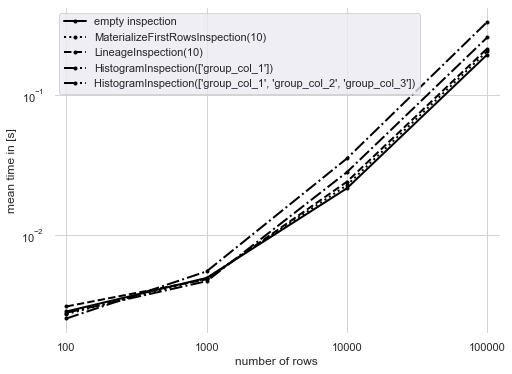

In [15]:
benchmark_op_inspections_and_plot_result(OperatorBenchmarkType.PROJECTION, inspection_linestyles, repeats)

Inspection Results for selection
Done: 100
Done: 1000
Done: 10000
Done: 100000
empty inspection: [0.01160876213332358, 0.01236350853332624, 0.044329350733335104, 0.3646146021999774]
MaterializeFirstRowsInspection(10): [0.010809137800004009, 0.01287495226667185, 0.04592420273332891, 0.3795548196000027]
LineageInspection(10): [0.012990198933331006, 0.013556202466664521, 0.0536229113999904, 0.4359638463333264]
HistogramInspection(['group_col_1']): [0.009261752466663135, 0.01306446286666869, 0.060788786866661816, 0.5158938134000057]
HistogramInspection(['group_col_1', 'group_col_2', 'group_col_3']): [0.009987273933332593, 0.013896311666667317, 0.06411153006667215, 0.628667943533325]


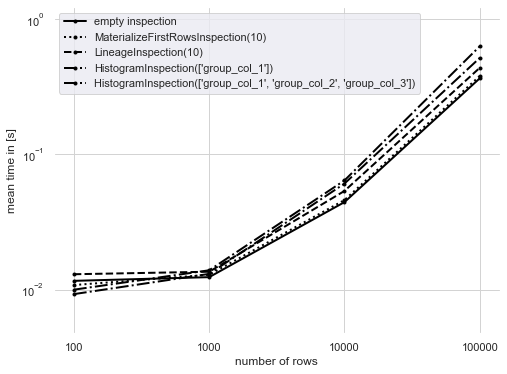

In [16]:
benchmark_op_inspections_and_plot_result(OperatorBenchmarkType.SELECTION, inspection_linestyles, repeats)

Inspection Results for join
Done: 100
Done: 1000
Done: 10000
Done: 100000
empty inspection: [0.01680851339998905, 0.021248300266658287, 0.06185801446669454, 0.5439085722000072]
MaterializeFirstRowsInspection(10): [0.018270286133338233, 0.02132180346667004, 0.06720503693331921, 0.5308864216000074]
LineageInspection(10): [0.01983462520000406, 0.021473702199993266, 0.08573151926667227, 0.7204851724666697]
HistogramInspection(['group_col_1']): [0.018051300066675442, 0.019090357733337743, 0.07761996853333433, 0.6410867219333493]
HistogramInspection(['group_col_1', 'group_col_2', 'group_col_3']): [0.018564803933319732, 0.019375201933341184, 0.09082256700000926, 0.7329626301333292]


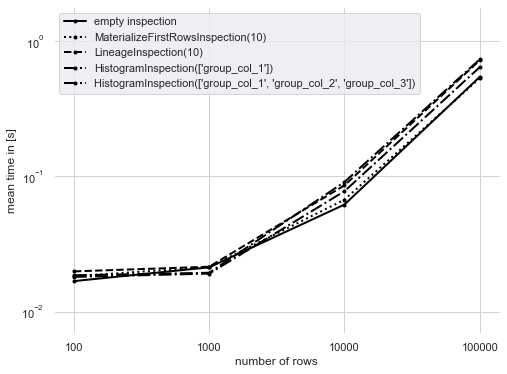

In [17]:
benchmark_op_inspections_and_plot_result(OperatorBenchmarkType.JOIN, inspection_linestyles, repeats)

Inspection Results for one_hot_encoder
Done: 100
Done: 1000
Done: 10000
Done: 100000
empty inspection: [0.002781628999984302, 0.0038810723333199348, 0.020050287333341053, 0.1644027962666769]
MaterializeFirstRowsInspection(10): [0.002737843466661616, 0.004388983733330558, 0.020436620666669115, 0.17306732633333013]
LineageInspection(10): [0.0029198032666575575, 0.004589255933342429, 0.0213163446000029, 0.21073919773331606]
HistogramInspection(['group_col_1']): [0.0023847222666821227, 0.00487139773333638, 0.025702212133334495, 0.23570590953333218]
HistogramInspection(['group_col_1', 'group_col_2', 'group_col_3']): [0.002544329466657776, 0.005106517866655243, 0.035580982200000714, 0.30735252039999067]


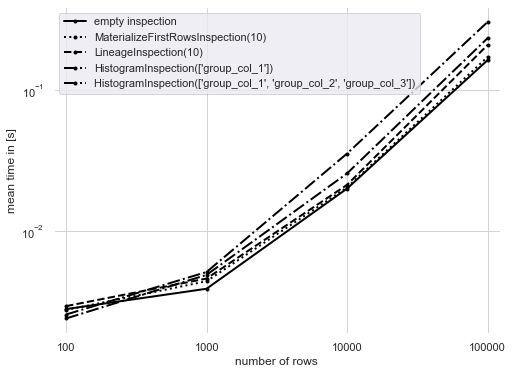

In [18]:
benchmark_op_inspections_and_plot_result(OperatorBenchmarkType.ONE_HOT_ENCODER, inspection_linestyles, repeats)

Full Pipeline Execution Results for healthcare (1000 rows)
Results
no mlinspect: [0.9783783899999889, 0.9612605859999803, 0.9492134110000734, 0.9457648819998212, 0.9452085129998977, 0.9431802199999311, 0.950940060999983, 0.9474867510000422, 0.9405719339999905, 0.9476984689999881, 0.9388031159999173, 0.943896044999974, 0.9456873080000605, 0.933089955000014, 0.9411338590000469]
no inspection: [1.0252774599998702, 1.01533782599995, 1.0109884829998919, 1.0200868470001296, 1.049466263000113, 1.0238204780000615, 1.0187702270000045, 1.0232114890000048, 1.024506418000101, 1.0231668119999995, 1.0201854469999034, 1.0466937319999943, 1.0241831030000412, 1.0224268029999166, 1.0281266909998976]
one inspection: [1.0890501730000324, 1.093109024000114, 1.1054365170000438, 1.102179372999899, 1.0948118510000313, 1.1045096570001078, 1.0925385949999509, 1.1130371090000608, 1.0935384250001334, 1.094099111999867, 1.0961317270000563, 1.0950410359998841, 1.10345634600003, 1.0982410540000274, 1.124578484000039

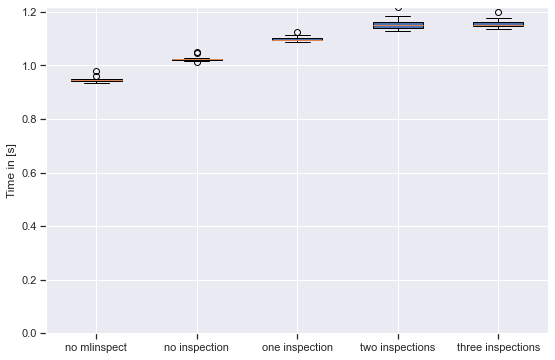

In [23]:
benchmark_full_pipeline_and_plot_result(PipelineBenchmarkType.HEALTHCARE, repeats)

Full Pipeline Execution Results for compas (train: 5050 rows, test: 2166)
Results
no mlinspect: [0.14233617599984427, 0.10090217199990548, 0.1118221030001223, 0.1080271549999452, 0.10941834300001574, 0.10472841399996469, 0.09837856900003317, 0.09829203900017092, 0.09821789099987654, 0.09725058699996225, 0.09524025100017752, 0.0984536759999628, 0.09703668499992091, 0.09709200200018131, 0.09833304399990084]
no inspection: [0.16389611200020227, 0.1569069770000624, 0.16032390999998825, 0.15960475700012466, 0.1699494770000456, 0.15537792899999658, 0.1650935729999219, 0.17468573700011802, 0.16917084300007446, 0.1566425609998987, 0.1692442140001731, 0.15586246100019707, 0.1567723240000305, 0.15852176599992163, 0.16153404500005308]
one inspection: [0.5980744790001609, 0.579202081999938, 0.5915920799998275, 0.5808020370000122, 0.5940044830001625, 0.5846364379999613, 0.6186466879998989, 0.5868114559998503, 0.6042471999999179, 0.6112154719999126, 0.5790202320001754, 0.5908356040001763, 0.59191049

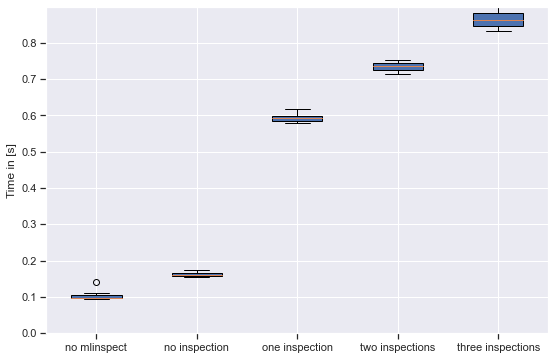

In [24]:
benchmark_full_pipeline_and_plot_result(PipelineBenchmarkType.COMPAS, repeats)

Full Pipeline Execution Results for adult_easy (22793 rows)
Results
no mlinspect: [0.3065785900000719, 0.27873483200005467, 0.2622453609999411, 0.26122766999992564, 0.2681939690000945, 0.26491958399992654, 0.26846538399991005, 0.26297876000012366, 0.271375455999987, 0.26038110700005745, 0.2585668169999735, 0.262042522999991, 0.2660745700000007, 0.265666685000042, 0.27411551000000145]
no inspection: [0.36295282299988685, 0.3340593909999825, 0.3653857799999969, 0.3748398289999386, 0.3415308720000212, 0.305019436000066, 0.30047737600011715, 0.3026858059999995, 0.3002297399998497, 0.29322042900003, 0.29652649199988446, 0.29788198999995075, 0.31896882799992454, 0.29675399699999616, 0.30212408000011237]
one inspection: [1.228474062000032, 1.2784672329999012, 1.2339848540000276, 1.245328956999856, 1.4894753139999466, 1.4138613999998597, 1.2441021919999002, 1.2483880730001147, 1.2696364309999808, 1.2352789689998644, 1.239912934000131, 1.2371696840000368, 1.2385824390000835, 1.232188296000004, 

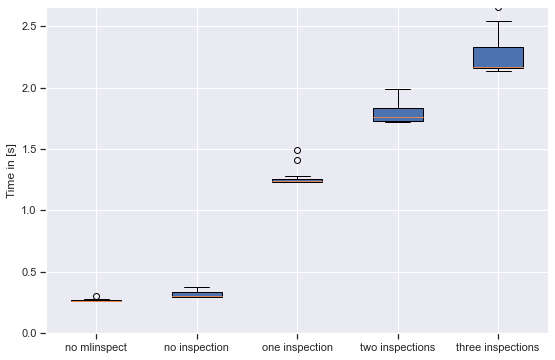

In [25]:
benchmark_full_pipeline_and_plot_result(PipelineBenchmarkType.ADULT_EASY, repeats)

Full Pipeline Execution Results for adult_normal (train: 22793 rows, test: 9770 rows)
Results
no mlinspect: [0.5394107719998829, 0.4353588830001627, 0.4497801300001356, 0.4356240219999563, 0.47874635199991644, 0.4916301989999283, 0.5643448400001034, 0.44339171100000385, 0.441786878999892, 0.4889500379999845, 0.4498471439999321, 0.4388853670000117, 0.4362900890000674, 0.5290287140001055, 0.6891444589998628]
no inspection: [0.5685708519999935, 0.48179634000007354, 0.48513138099997377, 0.47468113199988693, 0.47133883800006515, 0.47755464900001243, 0.46981525299997884, 0.4725161759999992, 0.4737100620000092, 0.47744389900003625, 0.5972406949999822, 0.4888477590000093, 0.5745601979999719, 0.5643842140000288, 0.6320241949999854]
one inspection: [1.5264988999999787, 1.6025209519998498, 1.5741520179999497, 1.5304444719999992, 1.5519101869999758, 1.5452003660000173, 1.5967772799999693, 1.4885224990000552, 1.4900835460000508, 1.475493766999989, 1.663847657999895, 1.531910974999846, 1.50610609899

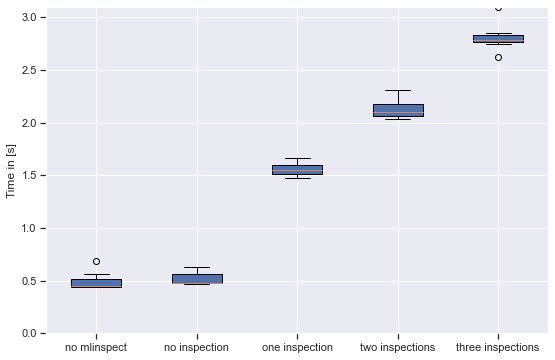

In [26]:
benchmark_full_pipeline_and_plot_result(PipelineBenchmarkType.ADULT_NORMAL, repeats)